# Pymaceuticals Analysis

## Overview:
The point of the following analysis was to determine the effectiveness of Capomulin against eight other types of treatment (and one placebo) for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.  The treatment plac was for 249 mice over a 45 day period.  With the provided csv files from the study, I cleaned, sorted, aggregated, and visualized the data to determine the efficacy of Capomulin.

## Analysis:
Below are pertinent observations based on the findings.

### 1 - Capomulin Remains Probable Candidate
Capomulin and Ramicane both proved to be the most effective treatment in terms of tumor growth shrinkage, with nearly identical results.  It would be interesting to see the results of treatment beyond 45 days to see if tumors completely shrunk for either study.

### 2 - Gender Split Nearly 50/50
The number of female to male mice in the study was nearly 50/50.  This might show solid effidence for the effectiveness of Capomulin as a general, go-to cancer treatment option that doesn't prefer one gender to the other.  Having maximal effectiviness on the largest amount of patients seems ideal for any treatment, given their cost.

### 3 - Weight Correlates Strongly with Tumor Volume
There was a strong correlation between the weight of mice and the average tumor volume for the study.  Some of this is certainly attributle to the pysical scale of a mouse, where measurable tumors would be proportionately larger to the mass of the mouse than for a human.  As tumor shrunk, mice lost significant weight in grams.  It is important to control for the weight of mice in future studies to not skew efficacy results.

### 4 - Decent Data
Out of all of the data, there was only one outlier. It was an inferior treatment, Infubinol, that saw an increase from its mean tumor volume as its last data point.  All treatments had over 100 data points, where 30 is considered statistically significant.








In [160]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.DataFrame.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [196]:
# Checking the number of mice.
print(f'There are {len(merged_df["Mouse ID"].unique())} mice in the study.')

There are 249 mice in the study.


In [163]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merged_df.drop_duplicates(['Mouse ID', 'Timepoint'])

In [191]:
# Checking the number of mice in the clean DataFrame.
print(f'The length of old DataFrame is {len(merged_df)}.  The length of cleaned DataFrame is {len(clean_df)}.')

The length of old DataFrame is 1893.  The length of cleaned DataFrame is 1888.


## Summary Statistics

In [166]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_med = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_stats = pd.DataFrame({"Mean of Tumor Volume": tumor_mean,
                              "Median of Tumor Volume": tumor_med,
                              "Variance of Tumor Volume": tumor_var,
                              "STD of Tumor Volume" :tumor_std, 
                              "SEM of Tumor Volume" :tumor_sem})
tumor_stats

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [189]:
#aggregation method for Stats Summary Table
tumor_stats_agg=clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})
tumor_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

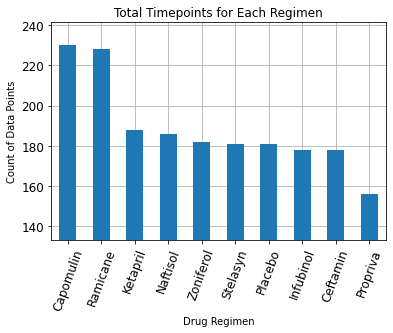

In [197]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

x_bar=list(clean_df['Drug Regimen'].value_counts().sort_values())

y_bar=clean_df['Drug Regimen'].unique()

ax = clean_df[['Drug Regimen', 'Timepoint']]

#pandas bar plot for total number of timepoints for all mice tested for each drug regimen
height=clean_df['Drug Regimen'].value_counts()
t_std = height.std()

pandas_bar = clean_df['Drug Regimen'].value_counts().plot.bar(xlabel='Drug Regimen', ylabel="Count of Data Points", 
                                                      grid=True, zorder=3, rot=70, title='Total Timepoints for Each Regimen',
                                                              fontsize=12, 
                                                              ylim=height.min()-t_std)
plt.show()

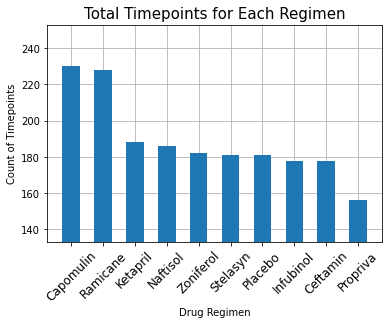

In [201]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



plt.bar(height.index,height, zorder=3, width=.55)
plt.ylim(height.min()-t_std, height.max()+t_std)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Count of Timepoints", fontsize=10)
plt.xticks(rotation=45, fontsize=12)
plt.title("Total Timepoints for Each Regimen", fontsize=15)
plt.grid()
plt.show()

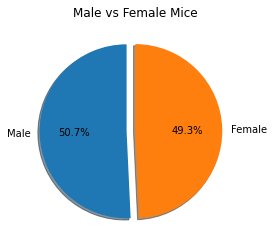

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = clean_df['Sex'].value_counts().plot.pie(startangle=90, explode=[0.1,0], title='Male vs Female Mice', label=" ",
                                                    shadow=True, autopct='%1.1f%%')
plt.show()

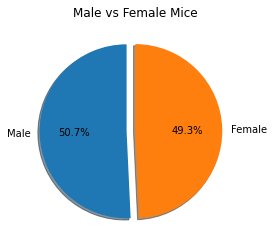

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_labels=list(clean_df['Sex'].unique())

plt.pie(clean_df['Sex'].value_counts(), labels=my_labels, explode=[0.1, 0], startangle=90, shadow=True, autopct='%1.1f%%')
plt.title("Male vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [176]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(merged_df.groupby(['Mouse ID'])['Timepoint'].max().sort_values())\
.rename(columns={'Timepoint':'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merged_df = pd.merge(merged_df, greatest_timepoint, on='Mouse ID')

In [177]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#set counter for first dividing line
counter = 0

for drug in treatments:
    if counter == 0:
        print("-"*64)
    temp_df = tumor_merged_df.loc[tumor_merged_df['Drug Regimen'] == drug]

    # Create sub dfs that narrow results to max timepoints
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    
    # Create series that is populated with final tumor volume and fill empty list
    final_vol = final_volume_df['Tumor Volume (mm3)']
    tumor_vol.append(final_vol)
    
    # Calculate and print the interquartile range (IQR)
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outlier_count = final_vol.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)].count()
    print(f'Number of {drug} outliers: {outlier_count}')
    print("-"*64)
    
    counter+=1       

----------------------------------------------------------------
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
----------------------------------------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
----------------------------------------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
----------------------------------------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
----------------------------------------------------------------


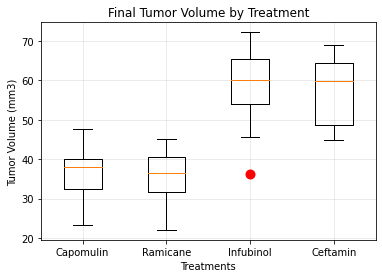

In [187]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  markeredgecolor='none')
plt.boxplot(tumor_vol,flierprops=flierprops)
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatments')
plt.xticks([1,2,3,4],treatments)
plt.grid(alpha=.3)
plt.show()

## Line and Scatter Plots

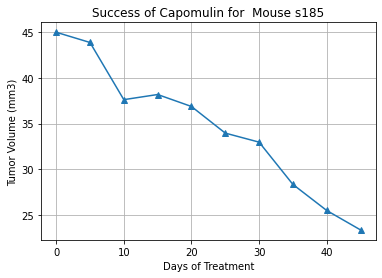

In [179]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#select the first mouse that was treated with Capomulin and get data from merged_df
capo_samp_time = merged_df[merged_df["Drug Regimen"] == 'Capomulin']["Mouse ID"].values[0]
capo_data_time = merged_df.loc[merged_df["Mouse ID"]==capo_samp_time]

#line plot
plt.plot(capo_data_time['Timepoint'], capo_data_time['Tumor Volume (mm3)'], marker='^')
plt.xlabel("Days of Treatment")
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Success of Capomulin for  Mouse {capo_samp_time}')
plt.grid()
plt.show()

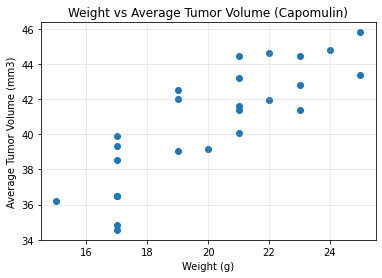

In [180]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#select only Capomulin data
capo_data = merged_df[merged_df["Drug Regimen"] == 'Capomulin']

#find average tumor_volume
scatter_data = capo_data.groupby('Mouse ID').agg({"Tumor Volume (mm3)" : 'mean'}).rename(
    columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
scatter_data

t_vol_vs_weight = pd.merge(capo_data, scatter_data, on="Mouse ID")
final_t_vol_vs_weight=t_vol_vs_weight[['Average Tumor Volume', 'Weight (g)']].drop_duplicates()

#scatter plot
plt.scatter(final_t_vol_vs_weight['Weight (g)'], final_t_vol_vs_weight['Average Tumor Volume'])
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume (Capomulin)')
plt.grid(alpha=.3)
plt.show()

## Correlation and Regression

The correlation coefficient between weight and average tumor volume
for Capomulin is 0.84.


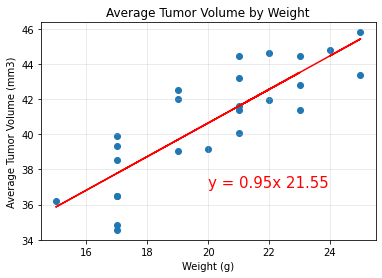

In [186]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#set variables for x & y for convenience
x=final_t_vol_vs_weight['Weight (g)']
y=final_t_vol_vs_weight['Average Tumor Volume']

correlation = st.pearsonr(x,y)
print(f"""The correlation coefficient between weight and average tumor volume
for Capomulin is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
slope_form = x * slope + intercept
line_eq = f"y = {str(round(slope,2))}x {str(round(intercept,2))}"

#repolot scatter
plt.scatter(x,y)
plt.plot(x,slope_form,"r-")

#add formula to graph
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.grid(alpha=.3)
plt.show()